# Machine learning

**What is machine learning**

Machine learning can be categorized as a subfield of artificial intelligence (as you read in the news), but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of building models of data.

Fundamentally, machine learning involves building mathematical models to help understand data. "Learning" enters when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data. Model-based "learning" is similar to the "learning" exhibited by the human brain.

Understanding the problem setting in machine learning is essential to using these tools effectively, and so we will start with some broad categorizations of the types of approaches we'll discuss here.

**Two categories of machine learning**：supervised and unsupervised learning
- Supervised learning: models that can predict labels based on labeled training data. (We have both y and x. We want to find an f such that y = f(x).)
    - Classification: models that predict labels as two or more discrete categories.
    - Regression: models that predict continuous labels.
- Unsupervised learning: models that identify structure in unlabeled data. (We only have x. We want to find the structure in x.)
    - Clustering: models that detect and identify distinct groups in the data
    - Dimensionality reduction: models that detect and identify lower-dimensional structure in higher-dimensional data.

**Other considerations**:
- Goal: inferences or prediction
- Choice of model: interpretability and flexibility


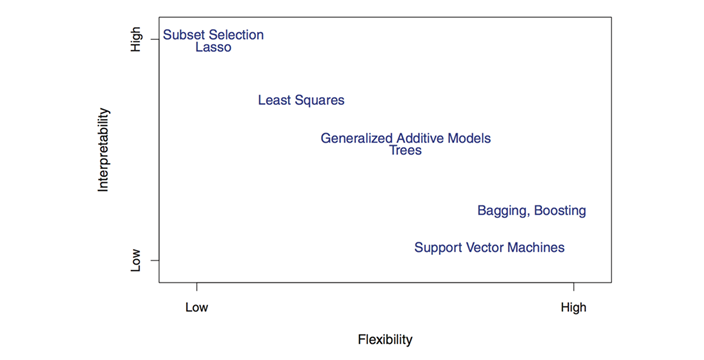

### Toolbox - Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

### How to use Sklearn

1. Choose a class of model and import it from sklearn.
1. Choose model hyperparameters by instantiating this class with desired values.
1. Arrange data into a features matrix (x or x matrix) and target vector (y).
1. Fit the model to your data by calling **fit()**.
1. Apply the model to your "new" data using **predict()**.

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

The feature matrix (x) and target vector (y) look like this:

In [1]:
from IPython.display import Image
Image(url = 'https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png')

# Linear Regression - Theory

**What is linear regression**?

"In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression." (Wikipedia).

**Mathematical model**

The underlying functional form y = f(x) can be written as

$ y = \beta_0 + \Sigma \beta_i x_i $

$\beta_0$: intercept

$\beta_i$: slope

Linear regression in general assumes x and y to be numerical variables. 

However, due to "randomness", the observed y in the sample carriess a "noise" $\epsilon$. 

$ y = \beta_0 + \Sigma \beta_i x_i + \epsilon$

The task of linear regression is to find out whether the linear form of functional f is valid, and what $\beta_0$ and $\beta_i$ can best represent their true value.

In MSE and chemistry, we often use linear regression differently from "rigorous" statistical theory.

- ordered sets of categorical data can become numerical
- "randomness" (error) can carry a particular pattern. And the meaning of the pattern is meaningful.

### Getting data loaded

Import all needed modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats

# step 1: choose a class of model
from sklearn import linear_model

%matplotlib inline

Import QM7b

In [3]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv');
qm7b.head()

,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0


# Simple linear regression


The linear regression model in ipython is bulit in scikit-learn: linear_model.LinearRegression() 

Let's start by invetigating how the atomization energy "ae_pbe0" depends on number of atoms of each molecule. 

Why we choose the number of atoms as x, and the atomization energy as y?

Doing simple linear regression:

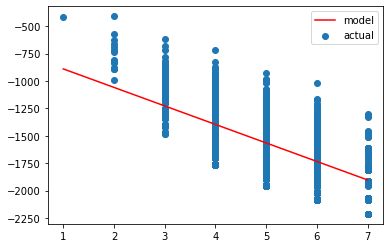

In [4]:
# step 2: Choose model hyperparameters by instantiating this class with desired values. One hyperparmeter: fit_intercept (bool), default=True
regr1 = linear_model.LinearRegression() 

# step 3: Arrange data into a features matrix (x or x matrix) and target vector (y).

# step 4: Fit the model to your data by calling **fit()**.
# regr1.fit(qm7b[['n_C']], qm7b['ae_pbe0']) # would give an warning due to recent sklearn updates 2022. 
regr1.fit(qm7b[['n_C']].values, qm7b['ae_pbe0'])

# step 5:  Apply the model to your "new" data using **predict()**.
plt.plot(np.linspace(1, 7, 7), regr1.predict(np.linspace(1, 7, 7).reshape(-1, 1)), color = 'red', label = 'model')

plt.scatter(qm7b['n_C'], qm7b['ae_pbe0'], label = 'actual')
plt.legend(loc = 'upper right')

In [5]:
print('beta_0, beta_1: ', regr1.intercept_, regr1.coef_[0])
# what does underscore "_" mean?

beta_0, beta_1:  -721.639889422995 -168.78645676400996


Now let's try to improve the model, and use total numbers of atoms as x.

In [6]:
natom = qm7b['n_C'] + qm7b['n_H'] + qm7b['n_O'] + qm7b['n_N'] + qm7b['n_Cl'] + qm7b['n_S']
natom.values.reshape(-1, 1).shape

(7211, 1)

beta_0, beta_1:  -316.840375281801 -80.84548925390523


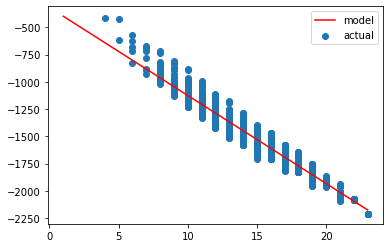

In [7]:
# step 2: Choose model hyperparameters by instantiating this class with desired values.
regr2 = linear_model.LinearRegression() 

# step 3: Arrange data into a features matrix (x or x matrix) and target vector (y).
natom = qm7b['n_C'] + qm7b['n_H'] + qm7b['n_O'] + qm7b['n_N'] + qm7b['n_Cl'] + qm7b['n_S']
natom = natom.values.reshape(-1, 1)
natom.shape

# step 4: Fit the model to your data by calling **fit()**.
regr2.fit(natom, qm7b['ae_pbe0'])

# step 5:  Apply the model to your "new" data using **predict()**.
plt.plot(np.linspace(1, 23, 23), regr2.predict(np.linspace(1, 23, 23).reshape(-1, 1)), color = 'red', label = 'model')

plt.scatter(natom, qm7b['ae_pbe0'], label = 'actual')
plt.legend(loc = 'upper right')
print('beta_0, beta_1: ', regr2.intercept_, regr2.coef_[0])

### "Least squares” minimization:

We aim to minimize $\Sigma_{n=1}^{N} (y_n - f(x_n))^2 $


In [8]:
# Try to change the intercept and slope in this line of code, and check how the result changes
#  (-721.639889422995 + -168.78645676400996 * qm7b['n_C']) = f(x)
#  qm7b['ae_pbe0'] means y
np.sum((-721.639889422995 + -168.78645676400996 * qm7b['n_C'] - qm7b['ae_pbe0']) ** 2)  # least squares minimization

191876170.08839375

### Assessment of the accuracy of linear regression:

**MSE (mean squared error)**: $ \frac{1}{N} \Sigma_{n=1}^{N} (y_n - f(x_n))^2 $


In [9]:
# mse1 = 1/7211 * np.sum((regr1.predict(qm7b[['n_C']]) - qm7b['ae_pbe0']) ** 2)  would give an warning due to recent sklearn updates 2022. 
mse1 = 1/7211 * np.sum((regr1.predict(qm7b[['n_C']].values) - qm7b['ae_pbe0']) ** 2)
mse2 = 1/7211 * np.sum((regr2.predict(natom) - qm7b['ae_pbe0']) ** 2)

print("MSE1:", mse1, "MSE2:", mse2)
# try sklearn.metrics.mean_squared_error in the handson session

MSE1: 26608.815710496983 MSE2: 2735.8266357372836


To find out the **pattern of error**: (hands-on)

1. y vs x, and f(x) vs x

1. parity plot: y vs f(x)

1. residual plot: (y - f(x)) vs. x

### Relationship to hypothesis testing

- regr1:
$H_0$: atomization energy ae_pbe0 does not depends linearly on the number of carbon atoms n_C.
- regr2:
$H_0$: atomization energy ae_pbe0 does not depends linearly on the total number of atoms.

In both cases, $H_0$: $ \beta_1 = 0 $

This hypothesis can be tested by **t test**. Interested reads can refer to chapter 3 of the book "An Introduction to Statistical Learning" listed in the resources page of the course website.



# Multiple linear regression


Any idea to improve the fitting? 

In this 2nd example, we generate model based on the idea that the atomization energy **ae_pbe0** of a molecule can be modeled as a contribution of the molecule's atomic composition: 

ae_pbe0 $ = \beta_0 + \beta_1 \times n_H + \beta_2 \times n_C + \beta_3 \times n_N + \beta_4 \times n_O + \beta_5 \times n_S + \beta_6 \times n_{Cl} $

The extension from simple to multiple linear regression is trivial: linear_model.LinearRegression already has multilinear model in it.

In [15]:
qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']]

,n_H,n_C,n_N,n_O,n_S,n_Cl
0,4,1,0,0,0,0
1,6,2,0,0,0,0
2,4,2,0,0,0,0
3,2,2,0,0,0,0
4,6,3,0,0,0,0
...,...,...,...,...,...,...
7206,4,3,0,3,1,0
7207,6,4,2,0,1,0
7208,6,4,2,0,1,0
7209,6,4,2,0,1,0


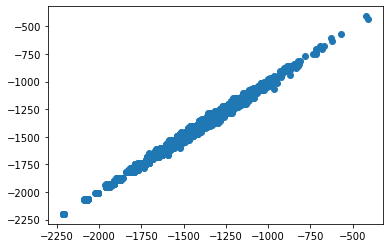

beta_0, beta_i:  26.92974516044228 [ -68.63775982 -160.97762832 -107.94065538 -109.4266244   -90.49299885
  -88.62921055]


In [10]:
# step 2: Choose model hyperparameters by instantiating this class with desired values.
regr3 = linear_model.LinearRegression() 

# step 3: Arrange data into a features matrix (x or x matrix) and target vector (y).
qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']]

# step 4: Fit the model to your data by calling **fit()**.
regr3.fit(qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']], qm7b['ae_pbe0'])

# step 5:  Apply the model to your "new" data using **predict()**.
plt.scatter(qm7b['ae_pbe0'], regr3.predict(qm7b[['n_H','n_C','n_N','n_O','n_S','n_Cl']]))

plt.show()
print('beta_0, beta_i: ', regr3.intercept_, regr3.coef_)

In [11]:
mse3 = 1/7211 * np.sum((regr3.predict(qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']]) - qm7b['ae_pbe0']) ** 2)
print("MSE1:", mse1, "MSE2:", mse2, "MSE3:", mse3)

MSE1: 26608.815710496983 MSE2: 2735.8266357372836 MSE3: 364.93159185282536


# Inferences using linear regression

In materials science and chemistry, it is important to reach human-understandable conclusions from statistical learning, rather than prediction alone. In this case, linear regression becomes the preferred method (the first method that you should try).

Task: understand the microscopic origin of atomization energy.

For simplicity, let's use the subset of molecules that only includes carbon and hydrogen atoms.

In [16]:
qm7b_sample_CH = qm7b.loc[ (qm7b['n_N'] + qm7b['n_O'] + qm7b['n_S'] + qm7b['n_Cl']) == 0]
qm7b_sample_CH.shape

(498, 21)

beta_0, beta_i:  38.379294768941236 [ -73.03836792 -155.88397464]
mse: 221.95999374423843


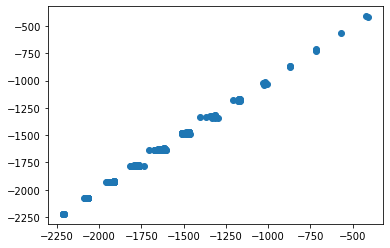

In [17]:
regr4 = linear_model.LinearRegression() 
regr4.fit(qm7b_sample_CH[['n_H', 'n_C']], qm7b_sample_CH['ae_pbe0'])
plt.scatter(qm7b_sample_CH['ae_pbe0'], regr4.predict(qm7b_sample_CH[['n_H','n_C']]))
print('beta_0, beta_i: ', regr4.intercept_, regr4.coef_)
print('mse:', 1/498 * np.sum((regr4.predict(qm7b_sample_CH[['n_H','n_C']]) - qm7b_sample_CH['ae_pbe0']) ** 2))

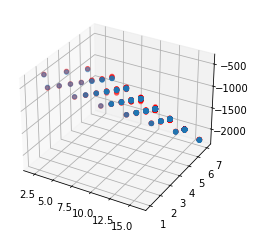

In [14]:
ax = plt.axes(projection='3d')
ax.scatter3D(qm7b_sample_CH['n_H'], qm7b_sample_CH['n_C'], regr4.predict(qm7b_sample_CH[['n_H','n_C']]), alpha = 0.5)
ax.scatter3D(qm7b_sample_CH['n_H'], qm7b_sample_CH['n_C'], qm7b_sample_CH['ae_pbe0'], color = 'red', alpha = 0.5)

Very rough interpretation:

number of C-H bond: n_H

number of C-C bond (assume single bond): (4 * n_C - n_H)/2

Total energy: n_H * E_CH + (4 * n_C - n_H)/2 * E_CC = (2 * E_CC) * n_C + (E_CH - 0.5 * E_CC) * n_H

E_CC = 78 (kcal/mol)

E_CH = 112 (kcal/mol)

# Nonlinear effects and interaction


Use Polynomial basis function:

$ y = \beta_0 + \Sigma_i \beta_{i} x_i + \Sigma_{i \leq j} \beta_{ij} x_i x_j$

x will not be independent.
if xi == xj, it's called nonlinear effects.
if i = j, it's called interaction effects.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
x_atom = qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']]
poly = PolynomialFeatures(2, include_bias=False)  # second order
x2_atom = poly.fit_transform(x_atom)
print(x2_atom.shape)
x2_atom[0]

(7211, 27)


array([ 4.,  1.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

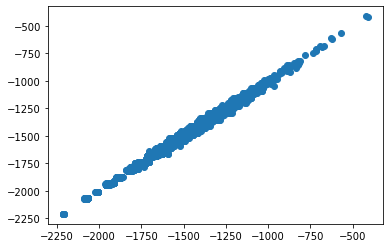

In [19]:
regr5 = linear_model.LinearRegression() 
regr5.fit(x2_atom, qm7b['ae_pbe0'])
plt.scatter(qm7b['ae_pbe0'], regr5.predict(x2_atom))
plt.show()

In [20]:
mse4 = 1/7211 * np.sum((regr5.predict(x2_atom) - qm7b['ae_pbe0']) ** 2)
print("MSE1:", mse1, "MSE2:", mse2, "MSE3:", mse3, "MSE4:", mse4)

MSE1: 26608.815710496983 MSE2: 2735.8266357372836 MSE3: 364.93159185282536 MSE4: 336.8553393184524
